# Cogs 108 - Final Project

# Overview


Our team explored how COVID-19 cases are related to traffic collisions. We analyzed the rate of New York City’s cases and the number of the city’s traffic collisions starting from the onset of the pandemic to August of this year. We applied linear regression on log-transformed data and found a negative correlation between the number of COVID-19 cases and the number of traffic collisions.

# Names

- Melvin Chang
- Julie Han
- Garvin Mo Zhen
- Nidhin Madhu

# Research Question
Is there a relationship between COVID-19 cases and the number of traffic collisions occurring in New York City? 

# Background and Prior Work
COVID-19 has resulted in several million infected individuals, and over thousands of deaths globally. In response to the rising infection rate, government-enforced lockdown restrictions began taking place in March 2020. These restrictions included implementing shelter-in-place and limiting non-essential travel. With fewer individuals and vehicles on the go, traffic collisions and related incidents are expected to have decreased.

According to an article published by [UC Davis](https://www.ucdavis.edu/news/california-covid-19-traffic-report-finds-silver-lining/), they reported that traffic accidents and traffic related injuries and death decreased by half during the first three weeks of California’s shelter-in-place order. On the other hand, a [Washington Post](https://www.washingtonpost.com/local/trafficandcommuting/the-coronavirus-pandemic-emptied-americas-highways-now-speeders-have-taken-over/2020/05/10/c98d570c-8bb4-11ea-9dfd-990f9dcc71fc_story.html) article described a disproportionate occurrence of speed-related crashes and fatalities during the first three months of the pandemic, months that received an especial surge in number of cases . 

We are curious to what extent either of these conclusions remain true for [New York City](https://www.nytimes.com/2020/11/12/us/coronavirus-crisis-united-states.html), the U.S. epicenter of the pandemic during the first few months of the outbreak, and one of the first locations to pioneer shutdown regulations. 

Figuring out whether or not rising covid cases have interfered with traffic collisions and fatalities, may lead to exposure to the issue and potential implementation measures to further regulate health and safety on highways. We are trying to measure the unintended impacts of COVID-19 cases on traffic conditions. 

References used in background:

Embedded hyperlinks

References used throughout:

-https://stats.stackexchange.com/questions/18480/interpretation-of-log-transformed-predictor-and-or-response

-https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/


# Hypothesis
We predict that the increase in  NYC’s COVID-19 cases would lead to a decrease in traffic collisions. In response to the rising number of cases, we expect stricter COVID-19 regulations to be implemented, meaning individuals will be forced to stay at home, work from home, and attend school online. As a result, we believe that there would be fewer vehicles on the streets and individuals are less likely to encounter head-on collisions. 


# Datasets
**Dataset Name: NYC Traffic Accidents**
- Link to the dataset: https://www.kaggle.com/gauravmehta13/nyc-traffic-accidents
- Number of observations: 74,881 (74,881 accidents x 29 columns)
- Description: This dataset contains data of motor vehicle collisions reported by the New York Police department from January 2020 to August 2020, where each row is a reported collision. The original dataset contained 1.7 million rows starting from 2015, we found a smaller version of the dataset that would be more relevant to our project

**Dataset Name: data-by-day.csv**
- Link to the dataset: https://github.com/nychealth/coronavirus-data/blob/master/trends/data-by-day.csv
- Number of observations: 288 (288 cases x 42 columns)
- Description: This dataset contains the number of COVID-19 cases day-by-day in New York City from February 2020 to December 2020

# Setup

In [38]:
#numpy and pandas
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#size of figures
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

## Data Cleaning

First, we began by loading in our datasets into two DataFrame variables **df_crash** for the dataset containing NYC car accidents and **df_cases** for the dataset containing day-by-day COVID-19 cases in NYC. 

In [2]:
# load in data
df_crash = pd.read_csv("NYC Accidents 2020.csv") 
df_cases = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv") 

In [3]:
# what the original datasets looks like
df_crash.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [4]:
df_cases.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT_7DAY_AVG,BX_DEATH_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT_7DAY_AVG,BK_DEATH_COUNT_7DAY_AVG,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,MN_CASE_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT_7DAY_AVG,MN_DEATH_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# shape and columns
print(df_crash.shape, df_crash.columns)
print(df_cases.shape, df_cases.columns)

(74881, 29) Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')
(288, 42) Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'PROBABLE_DEATH_COUNT',
       'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COU

We then only kept the columns which we deemed relevant for our project. For **df_crash**, we kept the date of the crash, the time of the crash, and the number of people killed because of the accident. Each column was renamed for simplicity purposes, and the DataFrame was sorted in chronological order beginning with January 1st.

In [6]:
# gets rid of columns we're not using
df_crash = df_crash.loc[:, ['CRASH DATE', 'NUMBER OF PERSONS KILLED']] 

# renames the columns
df_crash.rename(columns={'CRASH DATE':'date', 'NUMBER OF PERSONS KILLED':'people_killed',}, inplace=True) 
df_crash = df_crash.sort_values(by=['date'])
df_crash.head()

,date,people_killed
74880,2020-01-01,0
74651,2020-01-01,0
74652,2020-01-01,0
74653,2020-01-01,0
74654,2020-01-01,1


Next, we created the function standardize_month() in order to sort each accident by the month in which it occurred. We used this to convert the date to its respective month, so we may sum the number of car accidents that occurred in NYC by month.

In [7]:
def standardize_month(string):
  output = string.split("-")
  month = output[1]
  if '01' in month:
    month = 'Jan'
  elif '02' in month:
    month = 'Feb'
  elif '03' in month:
    month = 'Mar'
  elif '04' in month:
    month = 'Apr'
  elif '05' in month:
    month = 'May'
  elif '06' in month:
    month = 'Jun'
  elif '07' in month:
    month = 'Jul'
  elif '08' in month:
    month = 'Aug'
  elif '09' in month:
    month = 'Sep'
  elif '10' in month:
    month = 'Oct'
  elif '11' in month:
    month = 'Nov'
  elif '12' in month:
    month = 'Dec'
  return month

***Applying our function to df_crash and adding it as a new column to df_crash***

In [8]:
# standardizes the months of the car accident
df_crash['month'] = df_crash['date'].apply(standardize_month)
df_crash

,date,people_killed,month
74880,2020-01-01,0,Jan
74651,2020-01-01,0,Jan
74652,2020-01-01,0,Jan
74653,2020-01-01,0,Jan
74654,2020-01-01,1,Jan
...,...,...,...
133,2020-08-29,0,Aug
132,2020-08-29,0,Aug
131,2020-08-29,0,Aug
141,2020-08-29,0,Aug


Here, we created an array called *months* which stores String abbreviations of the months from January to August. We used this so that we can view the sum of accidents in each month in chronological order when we reindex the Series.

We also created a DataFrame called **df_crashes_total** which contains the total amount of reported crashes in the given month from January to August.

In [9]:
# reindexes the dataframe
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
        "Jul", "Aug"]
df_crashes_total = df_crash['month'].value_counts().reindex(index=months).to_frame().rename(columns={"month":"crashes"})

Next, we began to clean up the **df_cases** DataFrame which contains the data for the number of COVID-19 cases day-by-day in NYC. In **df_cases**, we kept the date of interest, the case count for that day, and also the death count for that day. Again, each column was renamed for simplicity.

In [10]:
# gets rid of columns we aren't using
df_cases = df_cases.loc[:, ['date_of_interest', 'CASE_COUNT', 'DEATH_COUNT']] # Columns to include
df_cases.rename(columns={'date_of_interest':'date',
                   'CASE_COUNT':'cases',
                   'DEATH_COUNT':'deaths'},inplace=True) 
df_cases

,date,cases,deaths
0,02/29/2020,1,0
1,03/01/2020,0,0
2,03/02/2020,0,0
3,03/03/2020,1,0
4,03/04/2020,5,0
...,...,...,...
283,12/08/2020,2829,17
284,12/09/2020,2771,19
285,12/10/2020,2489,20
286,12/11/2020,2008,15


We created the function standardize_cases() in order to sort each case by the month in which it occurred. It functions the same as standardize_months() used above. We used this function to convert the date to its respective month, so we may sum the number of COVID-19 cases there were in NYC by month.

In [11]:
def standardize_cases(string):
  output = string.split("/")
  month = output[0]
  if '01' in month:
    month = 'Jan'
  elif '02' in month:
    month = 'Feb'
  elif '03' in month:
    month = 'Mar'
  elif '04' in month:
    month = 'Apr'
  elif '05' in month:
    month = 'May'
  elif '06' in month:
    month = 'Jun'
  elif '07' in month:
    month = 'Jul'
  elif '08' in month:
    month = 'Aug'
  elif '09' in month:
    month = 'Sep'
  elif '10' in month:
    month = 'Oct'
  elif '11' in month:
    month = 'Nov'
  elif '12' in month:
    month = 'Dec'
  return month

***Applying our function to df_cases and adding it as a new column to df_cases***

In [12]:
df_cases['month'] = df_cases['date'].apply(standardize_cases)
df_cases

,date,cases,deaths,month
0,02/29/2020,1,0,Feb
1,03/01/2020,0,0,Mar
2,03/02/2020,0,0,Mar
3,03/03/2020,1,0,Mar
4,03/04/2020,5,0,Mar
...,...,...,...,...
283,12/08/2020,2829,17,Dec
284,12/09/2020,2771,19,Dec
285,12/10/2020,2489,20,Dec
286,12/11/2020,2008,15,Dec


In order to easily view the total number of COVID-19 cases each month, we made a **df_cases_total** DataFrame.

In [13]:
df_cases_total = df_cases.groupby(['month'])[['cases']].sum().reindex(index=months).fillna(0)
df_cases_total

,cases
month,
Jan,0.0
Feb,1.0
Mar,65185.0
Apr,109308.0
May,28449.0
Jun,10879.0
Jul,9839.0
Aug,7484.0


# Data Analysis

## Number of Car Accidents per Month


Text(0.5, 0, 'Month')

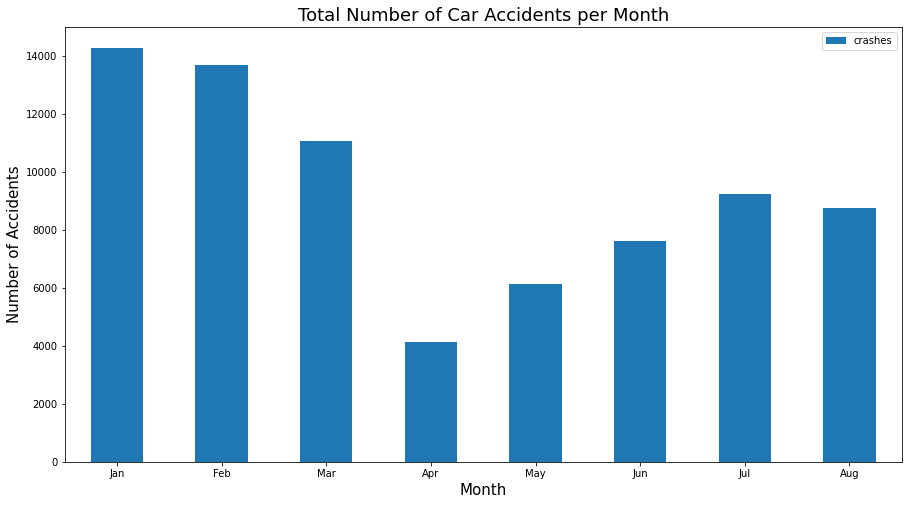

In [14]:
# Plots the number of accidents by month
plt1 = df_crashes_total.plot(figsize=(15,8), kind='bar', rot=0)
plt1.set_title('Total Number of Car Accidents per Month', fontsize = 18)
plt1.set_ylabel('Number of Accidents', fontsize = 15)
plt1.set_xlabel('Month', fontsize = 15)

## Number of COVID-19 Cases per Month

Text(0.5, 0, 'Month')

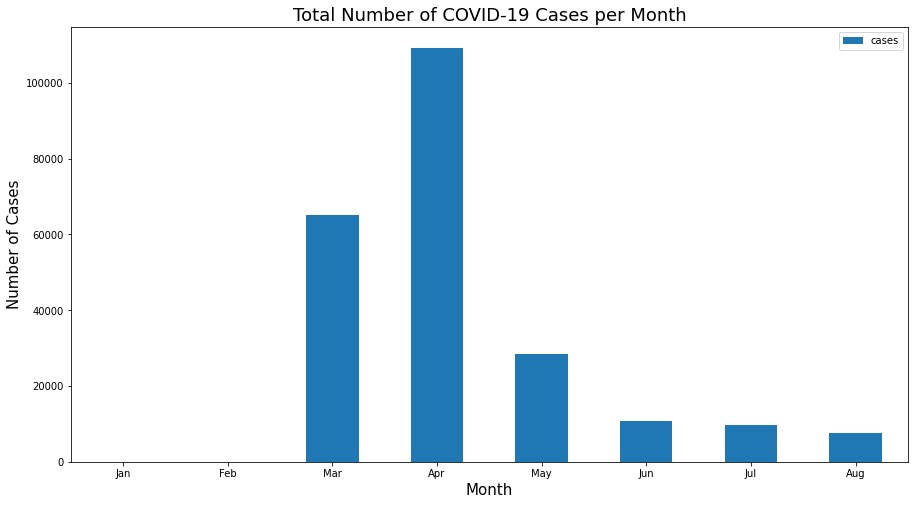

In [15]:
plt2 = df_cases_total.plot(figsize=(15,8), kind='bar', title='Number of Covid Cases per Month', rot=0)
plt2.set_title('Total Number of COVID-19 Cases per Month', fontsize = 18)
plt2.set_ylabel('Number of Cases', fontsize = 15)
plt2.set_xlabel('Month', fontsize = 15)

When comparing the two plots, during the month of April we notice that there is a significant spike in COVID-19 cases. On the other hand, we also notice a significant decline in the total number of crashes. Furthermore, as the number of COVID-19 cases begin to decline over the course of May, June, July, and August, we also see a considerable increase in car crashes in the same months.

This evidently displays a negative relationship between COVID-19 and the frequency of car crashes.




In [16]:
# Create a new dataframe containing the car accidents where a fatality occurred
df_fatal = df_crash[df_crash['people_killed'].astype(int)  > 0]

In [17]:
df_cases_fatal = df_cases.groupby(['month'])[['deaths']].sum().reindex(index=months).fillna(0)
df_cases_fatal

,deaths
month,
Jan,0.0
Feb,0.0
Mar,2184.0
Apr,12726.0
May,2827.0
Jun,743.0
Jul,319.0
Aug,133.0


Text(0.5, 0, 'Month')

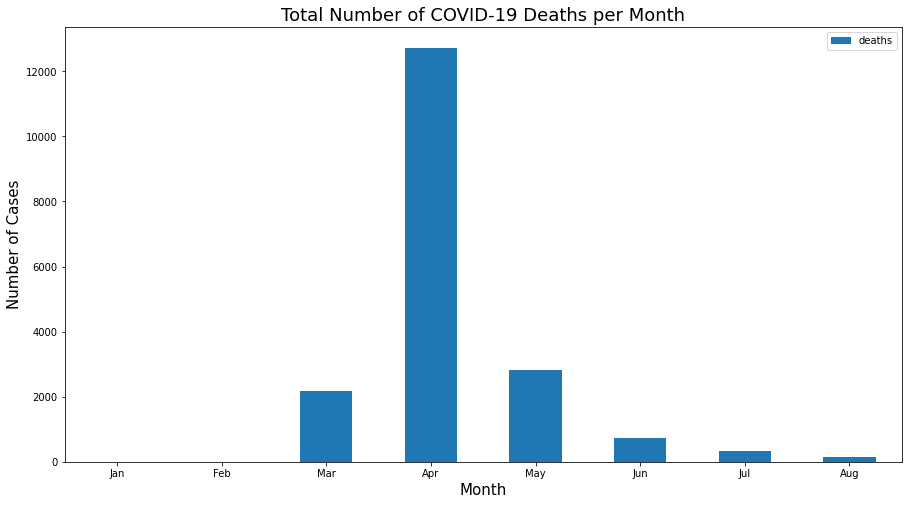

In [18]:
plt3 = df_cases_fatal.plot(figsize=(15,8), kind='bar', rot=0)
plt3.set_title('Total Number of COVID-19 Deaths per Month', fontsize = 18)
plt3.set_ylabel('Number of Cases', fontsize = 15)
plt3.set_xlabel('Month', fontsize = 15)

Text(0.5, 0, 'Month')

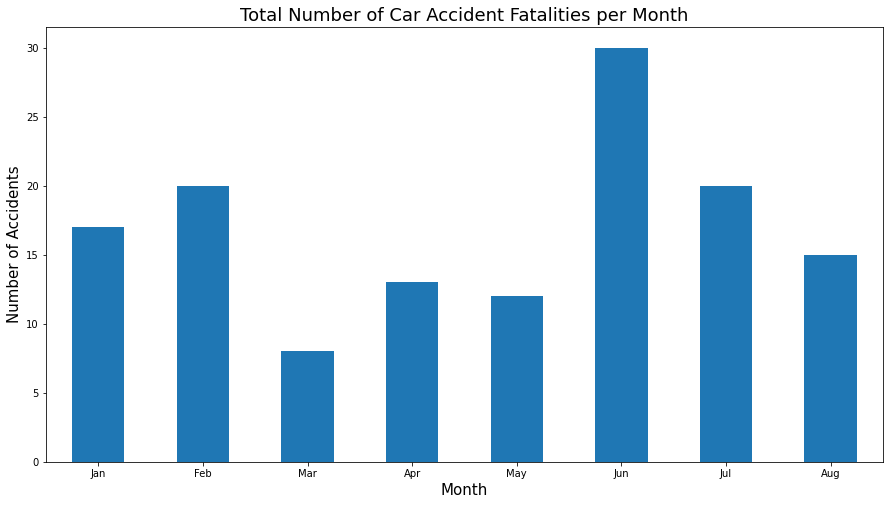

In [19]:
# Plots the number of car accident fatalities by month
plt4 = df_fatal['month'].value_counts().reindex(index=months).plot(figsize=(15,8), kind='bar', rot=0)
plt4.set_title('Total Number of Car Accident Fatalities per Month', fontsize = 18)
plt4.set_ylabel('Number of Accidents', fontsize = 15)
plt4.set_xlabel('Month', fontsize = 15)

When we compare the data available on the fatalities that occurred from both COVID-19 and car crashes, we can once again see this negative relationship, where car crash fatalities decline as COVID-19 fatalities increase. 

## Linear Regression Analysis

These functions are used to standardize dates for both datasets so they can be merged together into a single DataFrame.

In [20]:
def standardize_cases_date(date):
  """
  Returns a reformated date that is separated with dashes(-) insteand of (/)
  Input: MM/DD/YEAR
  Output format: MM-DD-YEAR
  To be used on COVID CASES DATASET
  """
  split_date = date.split("/")
  new_date = "-".join(split_date)
  return new_date

In [21]:
def standardize_crashes_date(date):
  """
  Returns reformated date to match the other dataset
  Input: YEAR-MM-DD
  Output format: MM-DD-YEAR
  To be used to NYC CRASHES DATASET
  """
  split_date = date.split("-")
  year = split_date[0]
  month = split_date[1]
  day = split_date[2]
  new_date = [month, day, year]
  return "-".join(new_date)

### Cleaned up NYC COVID-19 cases DataFrame

In [22]:
# making a new dataframe to be used for analysis
# getting rid of columns not being used
# standardizing date
df_cases2 = df_cases.loc[:, ['date', 'cases']]
df_cases2.rename(columns={'cases': 'case_count'}, inplace=True)
df_cases2['date'] = df_cases2['date'].apply(standardize_cases_date)
df_cases2

,date,case_count
0,02-29-2020,1
1,03-01-2020,0
2,03-02-2020,0
3,03-03-2020,1
4,03-04-2020,5
...,...,...
283,12-08-2020,2829
284,12-09-2020,2771
285,12-10-2020,2489
286,12-11-2020,2008


### Cleaned up NYC crashes DataFrame

In [23]:
df_crashes = df_crash.loc[:, ['date']]
#making every row 1, to sum up
df_crashes['crash_count'] = 1
#getting crash counts
aggregate_func = {'crash_count': 'sum'}
df_crashes = df_crashes.groupby('date', as_index=False).aggregate(aggregate_func)
#standarizing date
df_crashes['date'] = df_crashes['date'].apply(standardize_crashes_date)
df_crashes

,date,crash_count
0,01-01-2020,336
1,01-02-2020,409
2,01-03-2020,452
3,01-04-2020,347
4,01-05-2020,286
...,...,...
237,08-25-2020,264
238,08-26-2020,280
239,08-27-2020,281
240,08-28-2020,238


Both data sets are being merged into a single DataFrame so that they can be plotted on a scatterplot.

In [24]:
df_merged = pd.merge(df_cases2, df_crashes, on='date')
df_merged.head()

,date,case_count,crash_count
0,02-29-2020,1,456
1,03-01-2020,0,423
2,03-02-2020,0,562
3,03-03-2020,1,550
4,03-04-2020,5,541


In [25]:
#getting rid of outliers (like 0 and 1 cases in beginning of march)
df_merged = df_merged[df_merged['case_count'] > 10] 
df_merged.head()

,date,case_count,crash_count
8,03-08-2020,21,408
9,03-09-2020,57,545
10,03-10-2020,69,449
11,03-11-2020,155,473
12,03-12-2020,355,455


# Assumptions of Linear Regression
1. Linear relationship
2. Multivariate normality
3. No multicollinearity
4. No auto-correlation
5. Homoscedasticity



Text(0, 0.5, 'Daily Crashes in NYC')

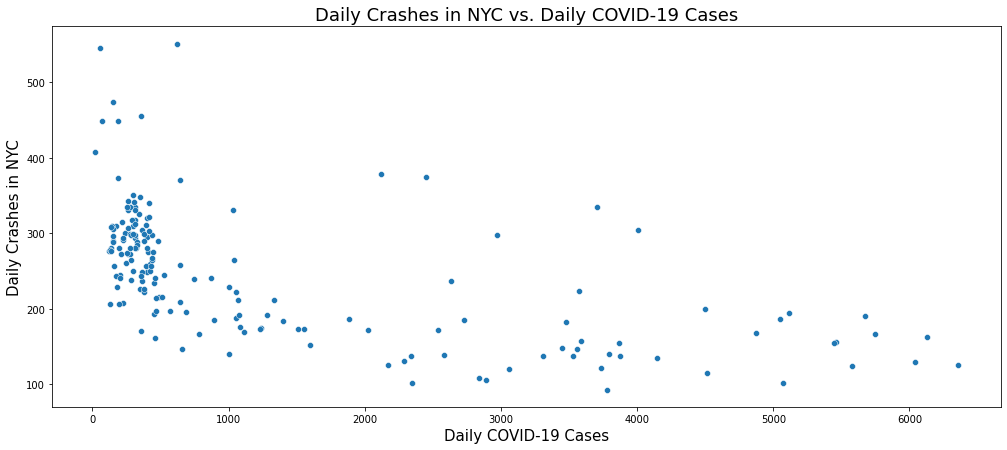

In [48]:
sns.scatterplot(x='case_count', y='crash_count', data=df_merged)
plt.title('Daily Crashes in NYC vs. Daily COVID-19 Cases', fontsize=18)
plt.xlabel('Daily COVID-19 Cases', fontsize=15)
plt.ylabel('Daily Crashes in NYC', fontsize=15)

1. **Linear Relationship**: Observing the plot above, we can identify that there is a non-linear relationship between both sets of data. In order to apply linear regression on our data, we will have to use log-transformation on our data.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Daily Crashes')

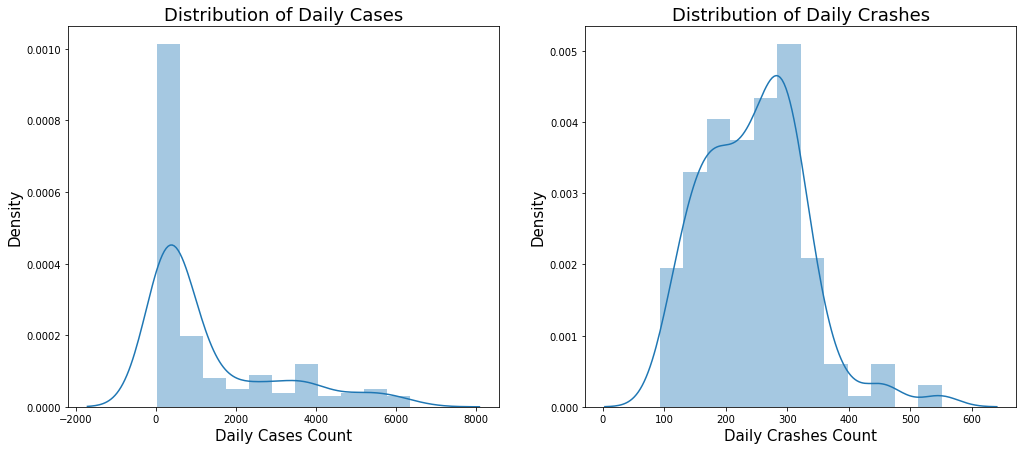

In [40]:
plt.subplot(1, 2, 1)
sns.distplot(df_merged['case_count'])
plt.ylabel('Density', fontsize=15)
plt.xlabel('Daily Cases Count',fontsize=15)
plt.title('Distribution of Daily Cases', fontsize=18)

plt.subplot(1, 2, 2)
sns.distplot(df_merged['crash_count'])
plt.ylabel('Density', fontsize=15)
plt.xlabel('Daily Crashes Count',fontsize=15)
plt.title('Distribution of Daily Crashes', fontsize=18)

Both datasets seemed to be skewed to the right, so we can apply logarithmic transformation to the data to help us with out analysis

In [28]:
#log transforming predictor and outcome variables
df_merged['case_count10'] = np.log10(df_merged['case_count'])
df_merged['crash_count10'] = np.log10(df_merged['crash_count'])
df_merged.head()

,date,case_count,crash_count,case_count10,crash_count10
8,03-08-2020,21,408,1.322219,2.610660
9,03-09-2020,57,545,1.755875,2.736397
10,03-10-2020,69,449,1.838849,2.652246
11,03-11-2020,155,473,2.190332,2.674861
12,03-12-2020,355,455,2.550228,2.658011


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Daily Crashes Post Log-Transformation')

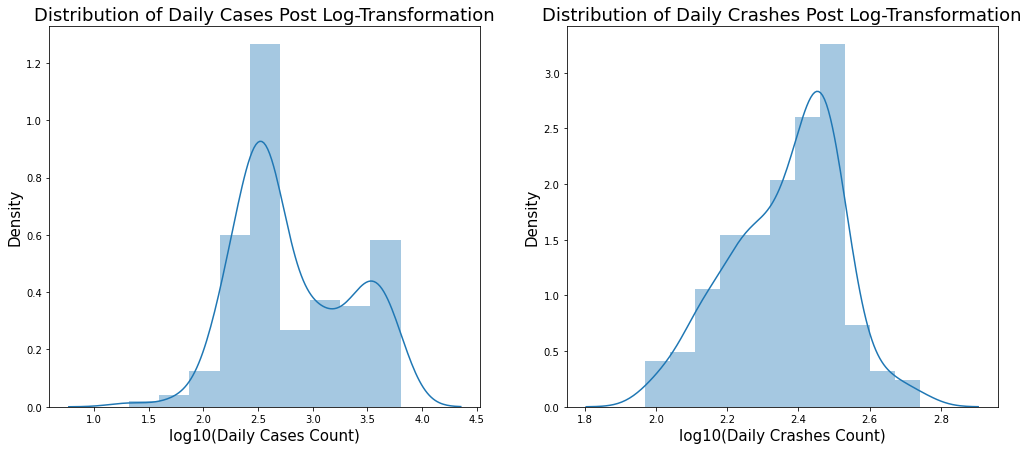

In [41]:
plt.subplot(1, 2, 1)
sns.distplot(df_merged['case_count10'])
plt.ylabel('Density', fontsize=15)
plt.xlabel('log10(Daily Cases Count)',fontsize=15)
plt.title('Distribution of Daily Cases Post Log-Transformation', fontsize=18)

plt.subplot(1, 2, 2)
sns.distplot(df_merged['crash_count10'])
plt.ylabel('Density', fontsize=15)
plt.xlabel('log10(Daily Crashes Count)', fontsize=15)
plt.title('Distribution of Daily Crashes Post Log-Transformation', fontsize=18)

Text(0.5, 1.0, 'Log Transformed Data: Crashes vs. COVID-19 Cases')

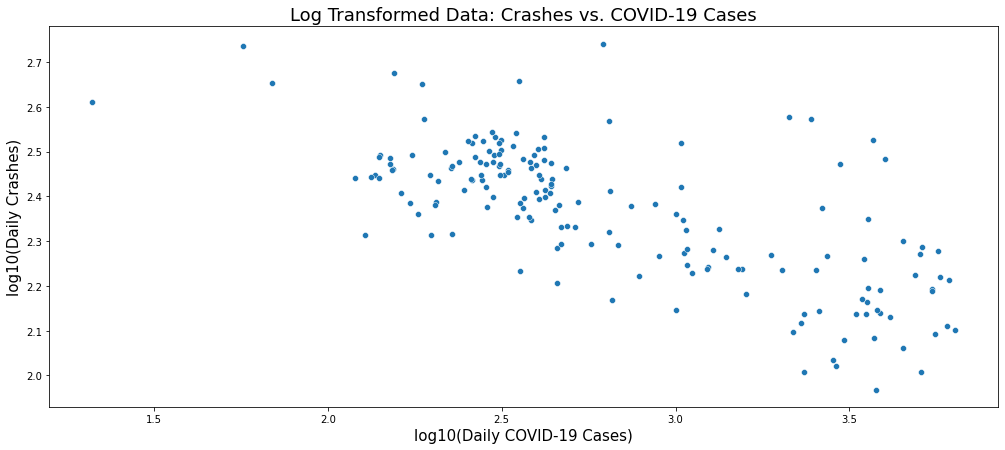

In [45]:
#plotting transformed data
sns.scatterplot(x='case_count10', y='crash_count10', data=df_merged)
plt.xlabel('log10(Daily COVID-19 Cases)', fontsize=15)
plt.ylabel('log10(Daily Crashes)', fontsize=15)
plt.title("Log Transformed Data: Crashes vs. COVID-19 Cases", fontsize=18)

After log transforming our data, we can see from the scatterplot it represents some sort of linear relationship. 

2. **Multivariate normality**: Data is transformed to ensure that we can assume that the variables we're using for linear regression have a normal distribution.

In [31]:
df_merged.corr() #correlation between variables

,case_count,crash_count,case_count10,crash_count10
case_count,1.000000,-0.582183,0.903323,-0.651262
crash_count,-0.582183,1.000000,-0.675705,0.973422
case_count10,0.903323,-0.675705,1.000000,-0.724331
crash_count10,-0.651262,0.973422,-0.724331,1.000000


3. **No multicollinearity**: Correlation matrix calculated above, we can observe that the number of COVID-19 cases is not highly correlated with the number of car crashes. The same can also be applied to the log transformed variables.
4. **No auto-correlation**: Variables are not auto correlated
5. **Homoscedasticity**: Variance in the log transformed scatterplot appears to be about the same across the data points.

All assumptions needed for linear regression are proven. We can now proceed with carrying out regression

# Linear Regression with Log Transformed Data

In [32]:
# carry out regression using log-transformed predictor
outcome, predictors = patsy.dmatrices('crash_count10 ~ case_count10', df_merged)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          crash_count10   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           9.58e-30
Time:                        11:01:45   Log-Likelihood:                 145.30
No. Observations:                 175   AIC:                            -286.6
Df Residuals:                     173   BIC:                            -280.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9721      0.045     66.631   

## Result Interpretation



We can see that the *effect size*($\beta$) estimate for case_count10 is `-0.2154`. But since we used log transformation on both of our variables. The equation can be written as:

$$\log_{10} (DailyCrashes) = 2.9722 - 0.2154*\log_{10}(DailyCovidCases)$$

 
We can intrepret this as for every one percent increase in `DailyCovidCases`, there would be a 0.2154 percent **decrease** in `DailyCrashes`


Similarly another way we can intepret the change on the effect of `DailyCovidCases`, is to select two value for it, $C_2$ and  $C_1$. And getting rid fo the intercept would give us this equation.

$$\log_{10}(DailyCrashes(C_2)) - log_{10}(DailyCrashes(C_1)) = \beta * [log_{10}(C_2) - log_{10}(C_1)]$$


Simplifying this we would end up with:

$$\displaystyle\frac{DailyCrashes(C_2)}{DailyCrashes(C_1)} = (\frac{C_2}{C_1})^\beta$$


From the equation above, we can see that the ratio of $C_2$/$C_1$ is consistent with the ratio of
 $DailyCrashes(C_2)/DailyCrashes(C_1)$.

Therefore, for a $10\%$ increase in COVID-19 cases we would expect the ratio for traffic collisions to be 

$$(1.10)^\beta = (1.10)^{-0.2154} \approx 0.9796795$$

In other words, a $10\%$ increase in cases would result in a $2\%$ decrease in traffic collisions in NYC.

Additionally, given the R-squared value of 0.525, we can calculate the Pearson correlation to be:

$$r = \sqrt{0.525} \approx \pm0.7245688373$$

Therefore, based on the regression coefficient of `-0.2154`, we can conclude the r value to be `-0.725`. Given this information, we can clearly see that our data has a negative correlation with each other.

## Visualizing the Model

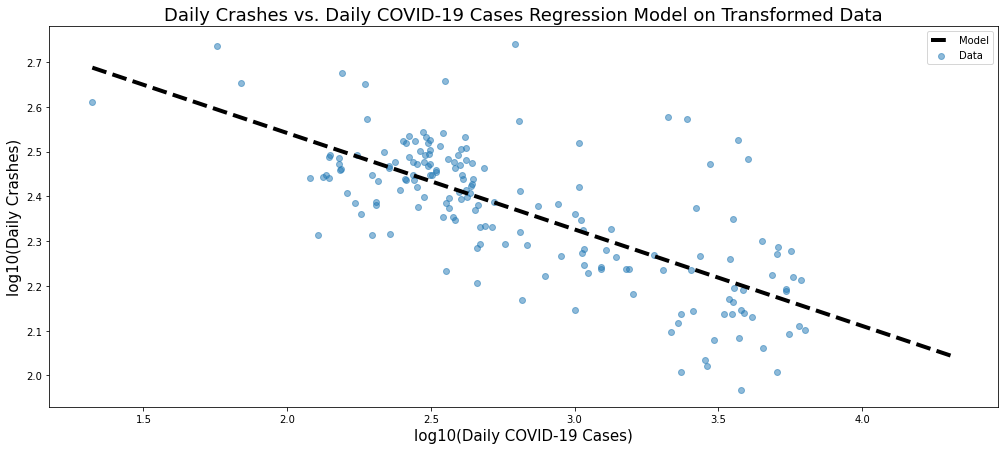

In [47]:
# Plot the orginal data (as before)
plt.scatter(df_merged['case_count10'], df_merged['crash_count10'], alpha=0.5, label='Data');

# Generate and plot the model fit line
xs = np.arange(df_merged['case_count10'].min(), df_merged['case_count10'].max()+.70)
ys = 2.9722 - 0.2154 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('log10(Daily COVID-19 Cases)', fontsize=15)
plt.ylabel('log10(Daily Crashes)', fontsize=15)
plt.title('Daily Crashes vs. Daily COVID-19 Cases Regression Model on Transformed Data', fontsize = 18)
plt.legend()

After performing linear regression on our log transformed data, we can clearly see that a **negative** relationship exists between our data.

Based on the data we see above, as well as the results we got from using linear regression, we can confidently accept our hypothesis. The negative correlation between the two sets of data supports our prediction that as COVID-19 cases increase, traffic collisions are expected to decrease.

# Ethics & Privacy

Our New York City Accidents in 2020 dataset was sourced from Kaggle, a data science company that publishes data sets. This specific data set was a New York City Police Department report, subjected to state public records. 

According to the author’s description, this file contains individual collisions, including date, time, location of the accident (burrough, zip-code, street name , latitude/longitude), and vehicles and victims involved. Although the author mentioned that the data set included the license plate and names of the individuals, this data was not included in the original data set. In order to protect the identification of these individuals, we followed the Safe Harbor Provision method, which limits the use and disclosure of protected health information and involves the process of de-identification; this ensures that any information that can be used to make individual identifications is removed. In our data study, we removed all identifiable information such as the geographic location (the site of the accident), collision ID, type of vehicle. 

The other dataset that contains the count of COVID-19 cases in NYC was also made publicly available on kaggle and It did not contain any sort of personal identifiable information.


# Conclusion

For this project, we sought out the relationship between the number of COVID-19 cases and the number of traffic collisions in New York City. After analyzing our data, we found that there exists a negative correlation between the two variables; As the number of COVID-19 cases increased, the number of traffic collisions decreased. This finding validates our hypothesis that traffic collisions decrease with an increase in COVID-19 cases, therefore we accept our hypothesis. 

Our data also shows that the initial surge in COVID-19 cases was when traffic collisions began going down. This data is reflective of the UC Davis article reporting that traffic accidents and related-injuries decreased during the onset of the pandemic. 

This demonstrates that the low number of traffic accidents might be the consequence of a rising infection rate and associated lock-down restrictions. However, as COVID-19 cases dipped in June, we see an increase in collision count and a jump in the fatality rate caused by traffic accidents. This can be the result of a confounding variable in quarantine fatigue causing more reckless behaviors as individuals started going outside again.

The limitation of our study is that it is not generalizable across other geographic locations. This data only characterizes the city of New York, one of the areas with the most extreme conditions: it was the epicenter of the pandemic and a densely populated city where accidents are common. In order to compare NYC with other cities, it must be similar in urban layout and population density. 

With the analysis of this data, we attempt to understand and reveal unintended consequences of COVID-19 cases and related restrictions. Such insight can potentially aid in upholding the safety of the population in regards to covid-related changes in behavior and traffic. Additionally, in the near future, remote work can be implemented throughout more companies to reduce traffic collisions.
